# spline Regression(loop version)

In [87]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

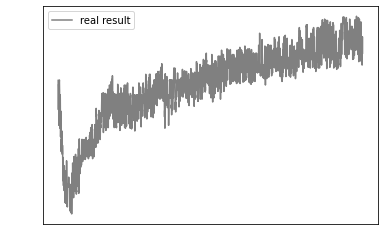

In [88]:
#import smooth data sheet at 120 C (time:0~5000s)
address = 'data/degradation.xlsx'
df = pd.read_excel(address,sheet_name = 'smooth data',usecols = [0],names = None,nrows = 5000)
df_li_Time_smooth = df.values.tolist()
df = pd.read_excel(address,sheet_name = 'smooth data',usecols = [3],names = None,nrows = 5000)
df_li_L_smooth = df.values.tolist()
#plot the data
plt.figure()
plt.plot(df_li_Time_smooth,df_li_L_smooth,'-',color = 'gray')
plt.legend(['real result'])
plt.tick_params(axis='y', colors = 'white')
plt.tick_params(axis='x', colors = 'white')
plt.show()

In [89]:
#import normal data sheet at 120 C (time:0~5000s) 
address = 'data/degradation.xlsx'
x_normal = []
y_normal = []
df = pd.read_excel(address,sheet_name = 'normal data',usecols = [0],names = None,nrows = 5000)
df_li_Time = df.values.tolist()
df = pd.read_excel(address,sheet_name = 'normal data',usecols = [3],names = None,nrows = 5000)
df_li_L = df.values.tolist()      

In [85]:
# randomly select 7 points from normal data
x_normal = np.array(df_li_Time).T
y_normal = np.array(df_li_L).T 
x_normal = x.reshape((5000))
y_normal = y.reshape((5000))
x_random = []
y_random = []
x_random = x_normal[[0,99,999,1999,2999,3999,4999]]
y_random = y_normal[[0,99,999,1999,2999,3999,4999]]

In [86]:
#iterate 5 times with mins value point of each curvle
x_cycle = []
y_cycle = []
x_loop = x_random
y_loop = y_random
list_x_loop = x_loop.tolist()
list_y_loop = y_loop.tolist()
i=0
while i <5:
    #get the function of spline regression with known data points
    s = interpolate.InterpolatedUnivariateSpline(list_x_loop,list_y_loop)
    x_uni = np.arange(0,5000,1)
    y_uni = s(x_uni) # get all the y value  (0~5000) based on the regession function
    list_y_uni = y_uni .tolist()
    list_y_uni_max_list = min(list_y_uni) #get the maxium value
    index = list_y_uni.index(min(list_y_uni)) # get the index of maxium value
    # add the min value of the function to the next loop list
    x_cycle.append(x_normal[index]) 
    y_cycle.append(y_normal[index])
    list_x_loop.extend(x_cycle)
    list_y_loop.extend(y_cycle)
    print(list_x_loop)
    print(list_y_loop)
    i += 1

ValueError: x must be increasing if s > 0